In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

esperance au
kapaa us
tonder dk
rubiataba br
barrow us
ilulissat gl
mataura pf
saleaula ws
atuona pf
punta arenas cl
ushuaia ar
orsha by
punta arenas cl
khatanga ru
punta arenas cl
kapaa us
punta arenas cl
high level ca
san quintin mx
bathsheba bb
atuona pf
kenai us
cherskiy ru
gat ly
clyde river ca
khatanga ru
yellowknife ca
praia da vitoria pt
le moule gp
albany au
fuengirola es
trapani it
tsihombe mg
vaini to
puerto ayora ec
isangel vu
alofi nu
norman wells ca
nikolskoye ru
jamestown sh
upernavik gl
bengkulu id
hithadhoo mv
taoudenni ml
hobart au
new norfolk au
mahebourg mu
manuk mangkaw ph
hermanus za
longyearbyen sj
longyearbyen sj
marcona pe
rikitea pf
port blair in
porbandar in
tuktoyaktuk ca
teneguiban ph
aksarayskiy ru
lebu cl
usinsk ru
ushuaia ar
ayan ru
mataura pf
paita pe
fortuna us
erzin ru
punta arenas cl
sarangani ph
yurla ru
tasiilaq gl
albany au
cockburn town tc
khatanga ru
khatanga ru
freeport us
atuona pf
praia cv
butaritari ki
saskylakh ru
airai pw
mackay au
kavieng

atuona pf
bluff nz
te anau nz
chermen ru
ushuaia ar
cherskiy ru
castro cl
rikitea pf
muriti tz
margate za
fortuna us
jamestown sh
atuona pf
vaini to
port elizabeth za
ushuaia ar
alekseyevka kz
hermanus za
puerto ayora ec
hermanus za
naryan-mar ru
tiksi ru
pisco pe
cidreira br
avarua ck
tasiilaq gl
barentsburg sj
castro cl
kommunisticheskiy ru
puerto narino co
sitka us
barrow us
bargal so
naze jp
albany au
ushuaia ar
clarksburg us
shingu jp
upington za
mys shmidta ru
hirara jp
marcona pe
halifax ca
ushuaia ar
vestmannaeyjar is
hermanus za
nishihara jp
vaini to
imbituba br
iaciara br
high rock bs
hilo us
hermanus za
albany au
vao nc
bredasdorp za
provideniya ru
praia cv
tenenkou ml
ateli in
rikitea pf
takoradi gh
guerrero negro mx
vaini to
praia da vitoria pt
chokurdakh ru
nuuk gl
kapaa us
jamestown sh
eregli tr
mvuma zw
kodiak us
cairns au
codrington ag
punta arenas cl
clyde river ca
puerto rondon co
parsons us
muros es
magadan ru
mataura pf
busselton au
busselton au
punta arenas cl
lov

aras no
lompoc us
saldanha za
mataura pf
upernavik gl
grand gaube mu
porosozero ru
durban za
punta arenas cl
hermanus za
freeport us
port alfred za
carnarvon au
cape town za
amderma ru
upernavik gl
marcona pe
avarua ck
katsuura jp
ushuaia ar
goderich sl
coquimatlan mx
tuktoyaktuk ca
ilulissat gl
cidreira br
saint-philippe re
mayo ca
atuona pf
katsuura jp
rondonopolis br
waipawa nz
jyvaskyla fi
belushya guba ru
illoqqortoormiut gl
rikitea pf
sentyabrskiy ru
acapulco mx
khatanga ru
punta arenas cl
college us
torbay ca
kodiak us
amderma ru
touros br
new bedford us
punta arenas cl
evensk ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | tonder
Processing Record 4 of Set 1 | rubiataba
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | orsha
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | high level
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | kenai
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | gat
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | praia da vitoria
Processing Rec

Processing Record 36 of Set 4 | yatou
Processing Record 37 of Set 4 | juquia
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | tevaitoa
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | masingbi
Processing Record 47 of Set 4 | merauke
Processing Record 48 of Set 4 | tromso
Processing Record 49 of Set 4 | staryy nadym
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | fare
Processing Record 4 of Set 5 | yarmouth
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | cooma
Processing Record 7 of Set 5 | kirya
Processing Record 8 of Set 5 | petropavlovskoye
Processing Record 9 of Set 5 | aguimes
Processing Record 10 of Set

Processing Record 25 of Set 8 | margate
Processing Record 26 of Set 8 | alekseyevka
Processing Record 27 of Set 8 | naryan-mar
Processing Record 28 of Set 8 | cidreira
Processing Record 29 of Set 8 | avarua
Processing Record 30 of Set 8 | kommunisticheskiy
Processing Record 31 of Set 8 | puerto narino
Processing Record 32 of Set 8 | clarksburg
Processing Record 33 of Set 8 | shingu
Processing Record 34 of Set 8 | upington
Processing Record 35 of Set 8 | hirara
Processing Record 36 of Set 8 | halifax
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | iaciara
Processing Record 39 of Set 8 | high rock
Processing Record 40 of Set 8 | tenenkou
Processing Record 41 of Set 8 | ateli
Processing Record 42 of Set 8 | takoradi
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | eregli
Processing Record 46 of Set 8 | mvuma
Processing Record 47 of Set 8 | cairns
Processing Record 48 of Set 8 | puerto rondon
Proce

Processing Record 17 of Set 12 | marsa matruh
Processing Record 18 of Set 12 | pahrump
Processing Record 19 of Set 12 | pimenta bueno
Processing Record 20 of Set 12 | waipawa
Processing Record 21 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | goderich
Processing Record 24 of Set 12 | salalah
Processing Record 25 of Set 12 | cam pha
City not found. Skipping...
Processing Record 26 of Set 12 | ciledug
City not found. Skipping...
Processing Record 27 of Set 12 | mayo
Processing Record 28 of Set 12 | naigarhi
Processing Record 29 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 12 | bowen
Processing Record 31 of Set 12 | pizhanka
Processing Record 32 of Set 12 | dentsville
Processing Record 33 of Set 12 | rexburg
Processing Record 34 of Set 12 | puerto escondido
Processing Record 35 of Set 12 | kenora
Processing Record 36 of Set 12 | the valley
Processing Record 37 of Set 12 | altus


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,58.84,72,95,10.71,AU,2021-09-29 01:17:35
1,Kapaa,22.0752,-159.3190,85.98,72,75,3.00,US,2021-09-29 01:17:00
2,Tonder,54.9331,8.8667,55.81,92,14,8.01,DK,2021-09-29 01:17:36
3,Rubiataba,-15.1644,-49.8033,84.38,28,81,2.59,BR,2021-09-29 01:17:36
4,Barrow,71.2906,-156.7887,28.42,86,90,4.61,US,2021-09-29 01:17:36
5,Ilulissat,69.2167,-51.1000,26.62,39,41,10.36,GL,2021-09-29 01:17:19
6,Mataura,-46.1927,168.8643,52.48,79,74,8.97,NZ,2021-09-29 01:17:08
7,Atuona,-9.8000,-139.0333,78.04,71,4,19.28,PF,2021-09-29 01:17:00
8,Punta Arenas,-53.1500,-70.9167,46.51,46,20,31.07,CL,2021-09-29 01:17:18
9,Ushuaia,-54.8000,-68.3000,44.26,53,75,21.85,AR,2021-09-29 01:15:33


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-09-29 01:17:35,-33.8667,121.9000,58.84,72,95,10.71
1,Kapaa,US,2021-09-29 01:17:00,22.0752,-159.3190,85.98,72,75,3.00
2,Tonder,DK,2021-09-29 01:17:36,54.9331,8.8667,55.81,92,14,8.01
3,Rubiataba,BR,2021-09-29 01:17:36,-15.1644,-49.8033,84.38,28,81,2.59
4,Barrow,US,2021-09-29 01:17:36,71.2906,-156.7887,28.42,86,90,4.61
5,Ilulissat,GL,2021-09-29 01:17:19,69.2167,-51.1000,26.62,39,41,10.36
6,Mataura,NZ,2021-09-29 01:17:08,-46.1927,168.8643,52.48,79,74,8.97
7,Atuona,PF,2021-09-29 01:17:00,-9.8000,-139.0333,78.04,71,4,19.28
8,Punta Arenas,CL,2021-09-29 01:17:18,-53.1500,-70.9167,46.51,46,20,31.07
9,Ushuaia,AR,2021-09-29 01:15:33,-54.8000,-68.3000,44.26,53,75,21.85


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

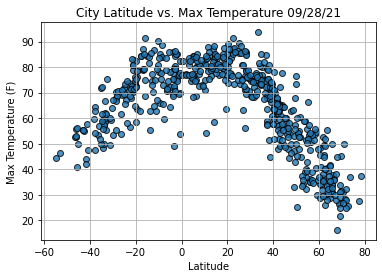

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

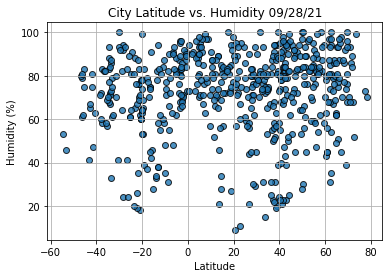

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

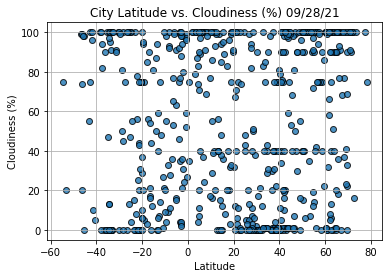

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

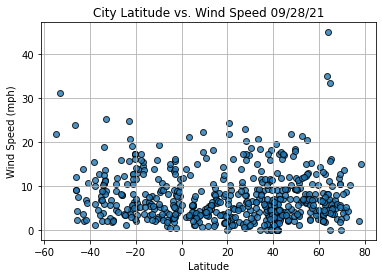

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                  San Quintin
Country                        MX
Date          2021-09-29 01:17:39
Lat                       30.4833
Lng                       -115.95
Max Temp                     68.5
Humidity                       78
Cloudiness                     17
Wind Speed                  18.68
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
564    False
565     True
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-09-29 01:17:00,22.0752,-159.3190,85.98,72,75,3.00
2,Tonder,DK,2021-09-29 01:17:36,54.9331,8.8667,55.81,92,14,8.01
4,Barrow,US,2021-09-29 01:17:36,71.2906,-156.7887,28.42,86,90,4.61
5,Ilulissat,GL,2021-09-29 01:17:19,69.2167,-51.1000,26.62,39,41,10.36
10,Orsha,BY,2021-09-29 01:17:38,54.5153,30.4053,40.06,95,72,6.06


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

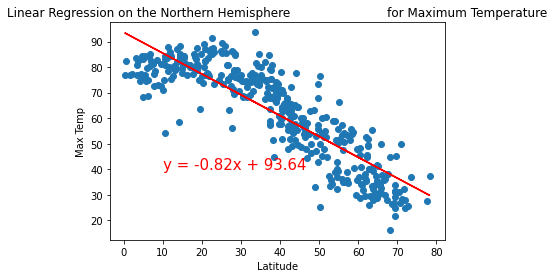

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

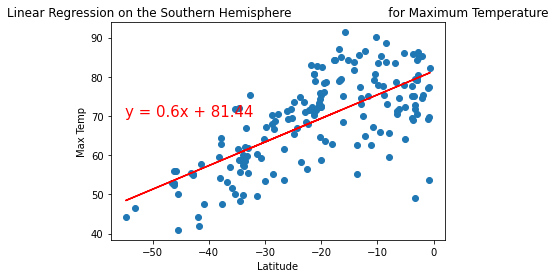

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

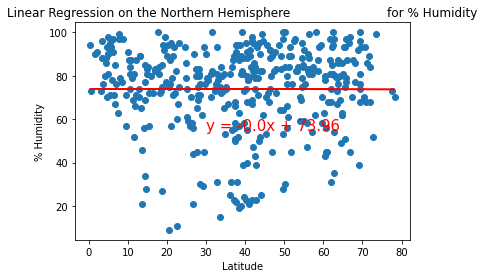

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

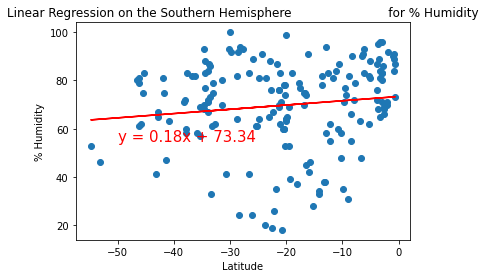

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

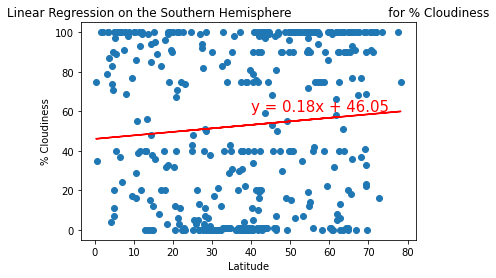

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

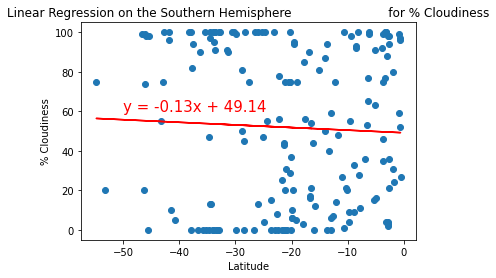

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

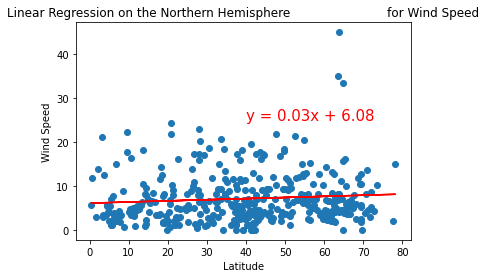

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

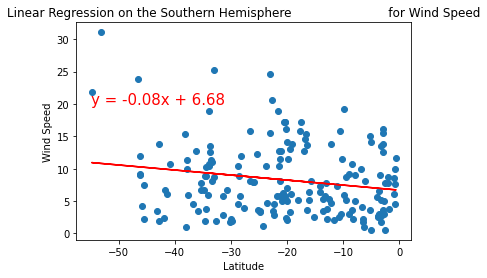

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))